No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


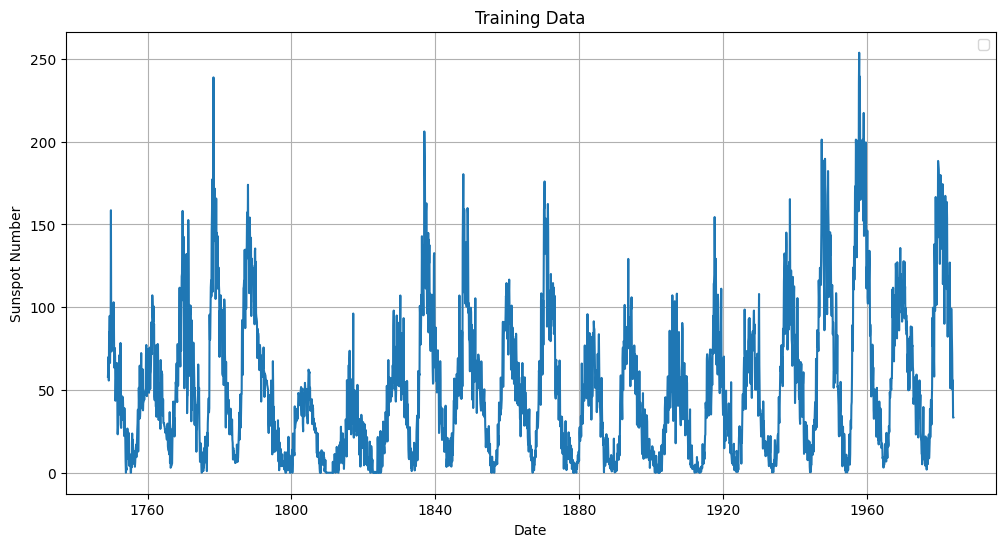

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error

# Load the sunspot data from sunspot.csv
data = pd.read_csv('monthly-sunspots.csv')
data['Month'] = pd.to_datetime(data['Month'])
data.set_index('Month', inplace=True)
sunspots = data['Sunspots']
train_data = data



# Plot the actual and predicted sunspot activity
plt.figure(figsize=(12, 6))
plt.plot(sunspots)
plt.xlabel('Date')
plt.ylabel('Sunspot Number')
plt.title('Training Data')
plt.legend()
plt.grid(True)
plt.show()


In [9]:
# Split the data into training and testing sets
train_data = sunspots.iloc[:int(0.8 * len(sunspots))]
test_data = sunspots.iloc[int(0.8 * len(sunspots)):]


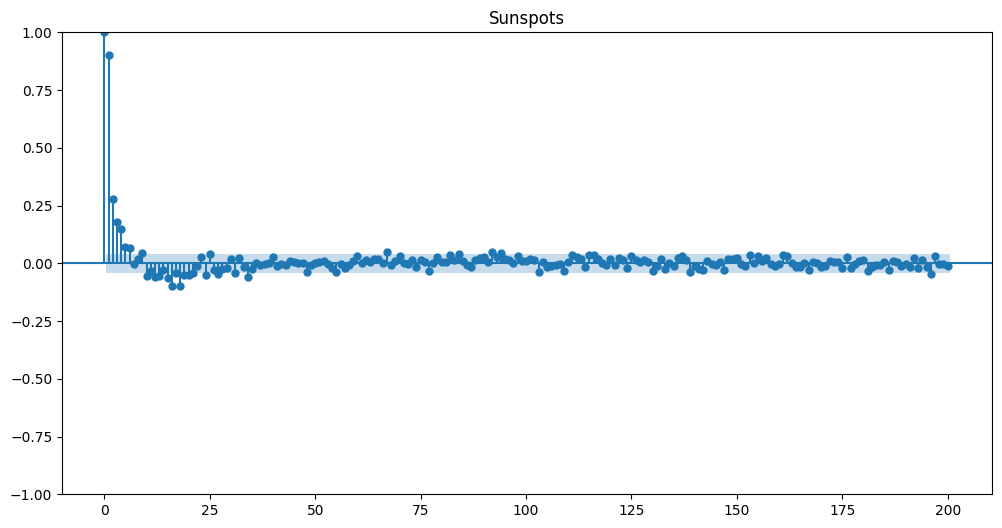

In [10]:

# Define a larger figure size (adjust these dimensions as needed)
fig, ax = plt.subplots(figsize=(12, 6))
# Create the ACF plot
plot_pacf(train_data, lags=200, title='Sunspots', ax=ax)
plt.show()

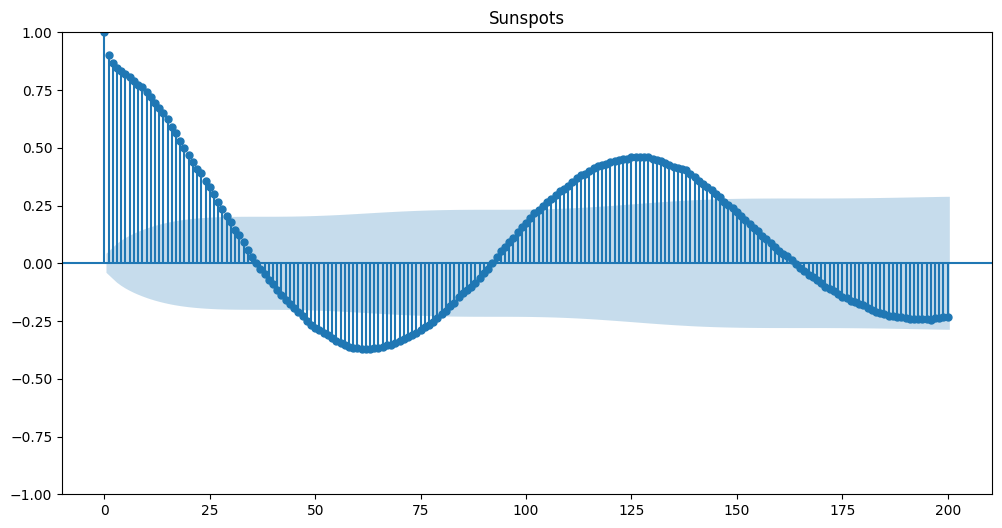

In [ ]:
# Define a larger figure size (adjust these dimensions as needed)
fig, ax = plt.subplots(figsize=(12, 6))
# Create the ACF plot
plot_acf(train_data, lags=200, title='Sunspots', ax=ax)
plt.show()

In [11]:
from statsmodels.tsa.stattools import adfuller
def printADFTest(serie):
    result = adfuller(serie, autolag='AIC')
    print("ADF Statistic %F" % (result[0]))
    print(f'p-value: {result[1]}')
    for key, value in result[4].items():
        print('Critial Values:')
        print(f'   {key}, {value}')
    
    print('\n')

#d = 0
printADFTest(train_data)   

ADF Statistic -7.939288
p-value: 3.3474836924189894e-12
Critial Values:
   1%, -3.433287122798914
Critial Values:
   5%, -2.8628375359198617
Critial Values:
   10%, -2.5674607403348455




In [19]:
model = sm.tsa.statespace.SARIMAX(train_data, trend='n', order=(3,0,10), seasonal_order=(1,1,0,40))
results = model.fit()
print(results.summary())

c:\Users\Drl\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Drl\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\Drl\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\Drl\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters

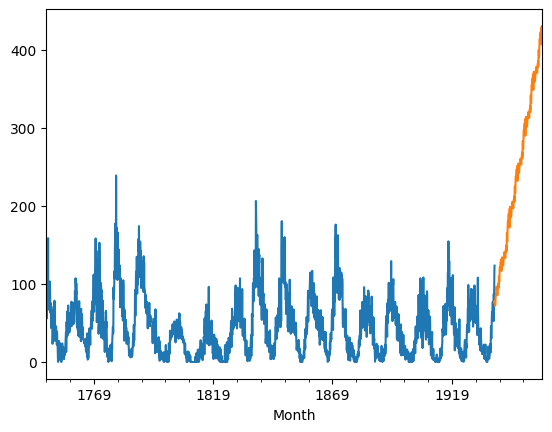

In [18]:
forecast = results.predict(start = train_data.index[-2], end= train_data.index[-2] + pd.DateOffset(months=240), dynamic= True) 
train_data.plot()
forecast.plot()
plt.show()